In [1]:
# 巡回セールスマン問題
# 全探索で最適解を見つけています

In [2]:
from math import sqrt
from random import randint
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# 地点数の設定
n = 8
li = [[randint(1, 20), randint(1, 20)] for _ in range(n)]

def calc_dist(a, b):
    return sqrt(pow(a[0] - b[0], 2) + pow(a[1] - b[1], 2))

def travelling_salesman_problem(n, pos):
    points = [int(x) + 1 for x in range(n)]
    routes = []
    for route in itertools.permutations(points):
        routes.append(route)
        
    ans_val = 1000000
    ans_route = None

    for route in routes:
        ans = 0
        curr_pos = route[0]
        for next_pos in route[1:]:
            ans += calc_dist(pos[curr_pos - 1], pos[next_pos - 1])
            curr_pos = next_pos
        ans += calc_dist(pos[curr_pos - 1], pos[route[0] - 1])
        if ans <= ans_val:
            ans_val = ans
            ans_route = route
    
    return ans_val, ans_route

In [3]:
ans_val, ans_route = travelling_salesman_problem(n, li)
print(int(ans_val), ans_route)

50 (4, 2, 3, 5, 7, 6, 8, 1)


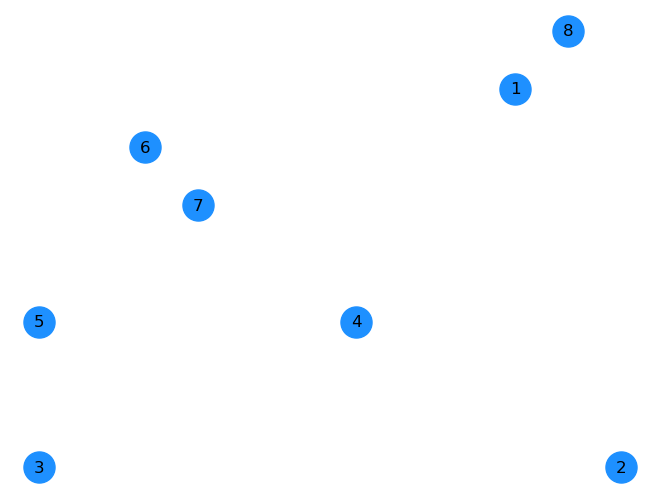

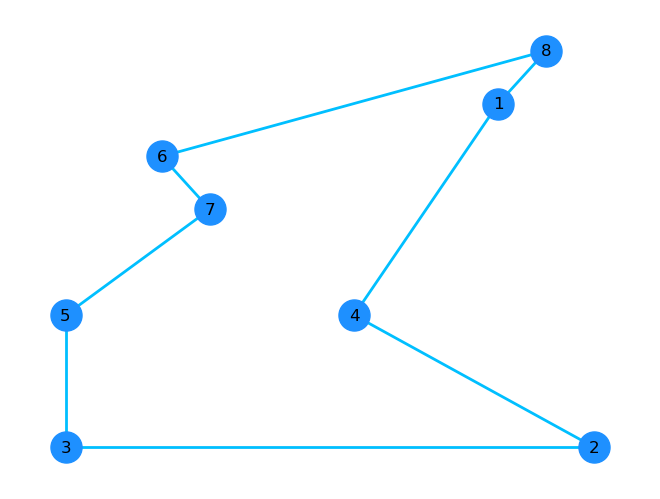

In [4]:
#NetworkXで位置データと最短ルートの描写

node_size = 500
node_color = "#1E90FF"
edge_color = "#00BFFF"
width = 2
pos = {}
G = nx.Graph()
G.add_nodes_from([x for x in range(1, n + 1)])
for i, ele in zip(range(1, n + 1), li):
        pos[i] = ele
edges = []
for i in range(n):
        edges.append((ans_route[i], ans_route[(i + 1) % n]))
nx.draw(G, pos,node_color=node_color,node_size=node_size,
        width=width, with_labels=True)
plt.show()
G.add_edges_from(edges)
nx.draw(G, pos,node_color=node_color,node_size=node_size,
        edge_color=edge_color,width=width,with_labels=True)
plt.show()